<a href="https://colab.research.google.com/github/LuisMedinaBravo/Minor-Machine-Learning/blob/main/RendimientoAutomoviles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Regresion Lineal aplicada a datos de automóviles

En esta tarea usted debe investigar acerca del conjunto de datos [auto mpg](https://seaborn.pydata.org/examples/scatter_bubbles.html) perteneciente a la libreria [seaborn](https://seaborn.pydata.org/)

**Objetivo**: Estimar el rendimiento promedio de automoviles usando regresión lineal

1) (1 punto) Establecer una visualización de los datos a través de un [Gráfico de dispersión](https://seaborn.pydata.org/tutorial/axis_grids.html)

In [76]:
from scipy import randn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

data = sns.load_dataset('mpg')
#mpg = sns.load_dataset("mpg")
#data = sns.read_csv("sample_data/auto-mpg.csv")
data.head()





,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


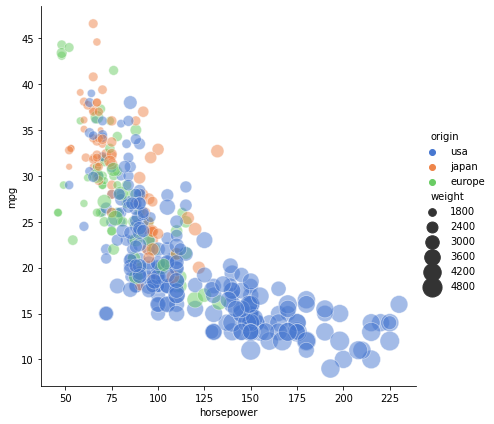

In [77]:
sns.relplot(x="horsepower", y="mpg", hue="origin", size="weight",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=data)

2) (1 punto) Investigar e incluir un grafico de correlacion ([Correlation Plot](https://seaborn.pydata.org/examples/many_pairwise_correlations.html)) para visualizar la dependencia entre los datos 

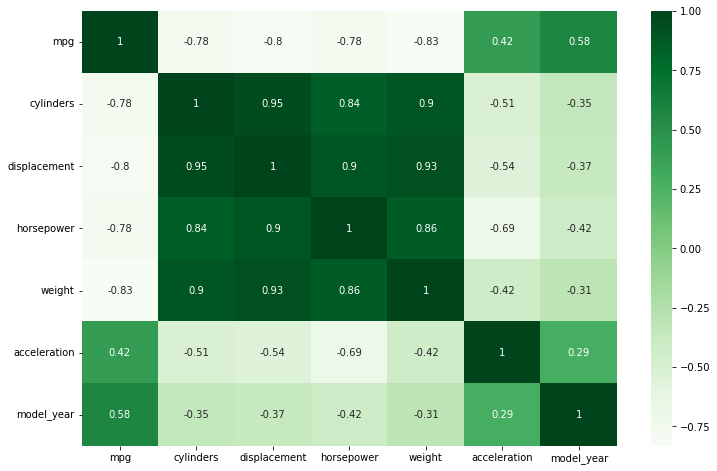

In [79]:
corr = data.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="Greens",annot=True)


3) (1 punto) Construir y entrenar un modelo de regresion lineal

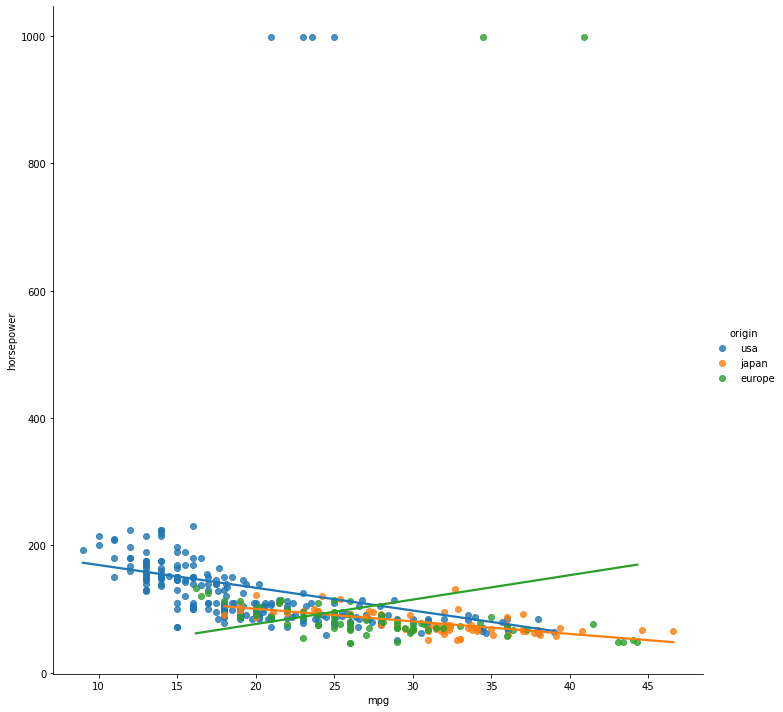

In [148]:
topeucountries = ['usa','japan','europe']
Datas = data[data['origin'].isin(topeucountries)]
#seaborn
sns.lmplot(x="mpg", y="horsepower", data=Datas, hue='origin', ci=False, height=10)

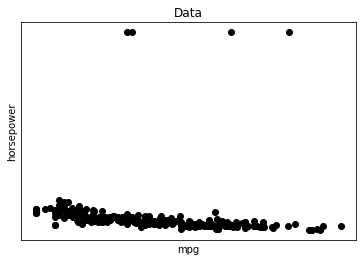

In [147]:
from sklearn.linear_model import LinearRegression


X = data['mpg']
Y = data['horsepower']

X=X.values.reshape(len(X),1)
Y=Y.values.reshape(len(Y),1)

X_train = X[:-250]
X_test = X[-250:]

Y_train = Y[:-250]
Y_test = Y[-250:]

# Salidas
plt.scatter(X_test, Y_test,  color='black')
plt.title('Data')
plt.xlabel('mpg')
plt.ylabel('horsepower')
plt.xticks(())
plt.yticks(())

plt.show()

In [143]:
from scipy import stats

features = data["mpg"]
labels = data["horsepower"]
slope, intercept, r, p, std_err = stats.linregress(features, labels)

def lineFunc(x):
  return slope * x + intercept



4) (1 punto) Mostrar estadistiscas de desempeño del modelo (investigar)

In [144]:
# Hacer una predicción de Rendimiento de los horsepower de un automóvil de 4 mpg 

horsepower = lineFunc(4)
print(horsepower)

172.15876047289697


In [146]:
# Hacer una predicción de Rendimiento los horsepower de un automóvil de 15 mpg 

horsepower = lineFunc(15)
print(horsepower)

141.60498628657277


In [145]:
# Hacer una predicción de Rendimiento los horsepower de un automóvil de 60 mpg 

horsepower = lineFunc(60)
print(horsepower)

16.61227370615552


5) (1 punto) Mostrar [graficamente la lineas rectas](https://seaborn.pydata.org/tutorial/regression.html) en un grafico de dispersión para el par de variables que presentan la mayor correlacion. esta informacion la obtiene del correlation plot. realizar un grafico de dispersion con las variables mas correlacionadas.